In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use("seaborn-darkgrid")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Utility Plotting function

In [101]:
def plot(
    X,
    y,
    title="X versus Y",
    xlabel="X-axis",
    ylabel="Y-axis",
    figsize=(10, 8),
    centers=None,
):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cdict = {0: "red", 1: "blue", 2: "green", 3: "yellow"}
    centers = None if centers is None else np.array(centers)

    for ctype in cdict:
        type_idx = np.where(y == ctype)
        plt.scatter(
            X[type_idx, 0],
            X[type_idx, 1],
            c=cdict[ctype],
            label=ctype,
            marker=".",
            s=25,
        )

        # plot centers if provided
        if centers is not None:
            plt.text(
                centers[ctype, 0] + 0.1,
                centers[ctype, 1] + 0.1,
                f"Centroid {ctype}",
                fontsize=9,
            )
            plt.scatter(
                centers[ctype, 0], centers[ctype, 1], c=cdict[ctype], marker="x", s=100
            )

    plt.legend()
    plt.show()

### Importing Mall Customers dataset

In [76]:
X_feat = pd.read_csv("../data/Mall_Customers.csv", index_col=0)

### Exploratory Data Analysis

Checking for the presence of NAN values and the data types

In [77]:
X_feat

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [78]:
X_feat.dtypes, X_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


(Gender                    object
 Age                        int64
 Annual Income (k$)         int64
 Spending Score (1-100)     int64
 dtype: object,
 None)

So our dataset does not have any NAN values and data types are `int64`

### Statistical Analysis of our dataset

In [79]:
X_feat.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Distribution of Age, Income and Spending Score

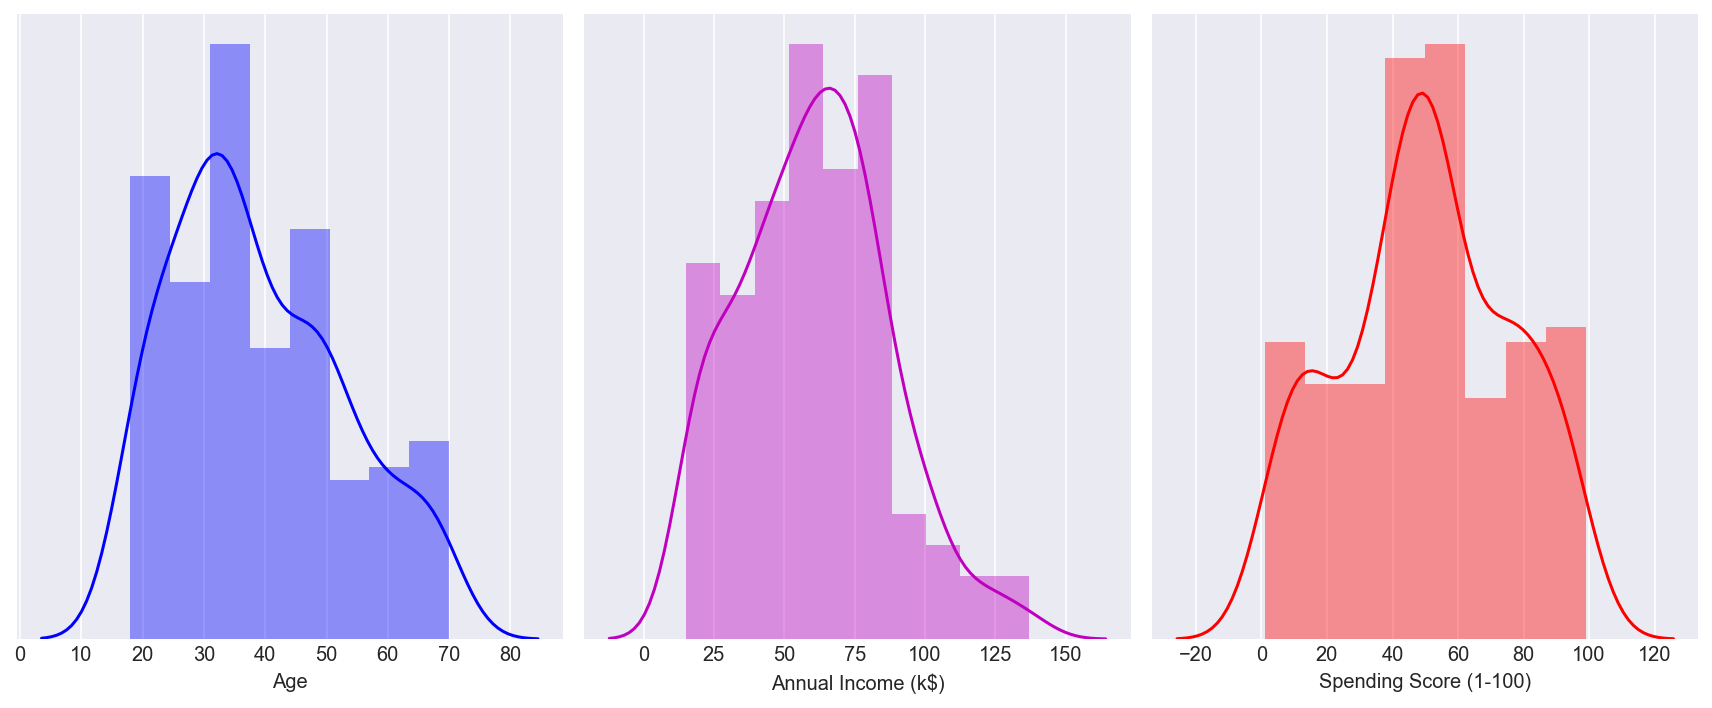

In [80]:
f, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=False)

sns.despine(left=True)

sns.distplot(X_feat["Age"], color="b", ax=axes[0])
sns.distplot(X_feat["Annual Income (k$)"], color="m", ax=axes[1])
sns.distplot(X_feat["Spending Score (1-100)"], color="r", ax=axes[2])

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Boxplots for Age, Income, and Spending Score separated by Gender

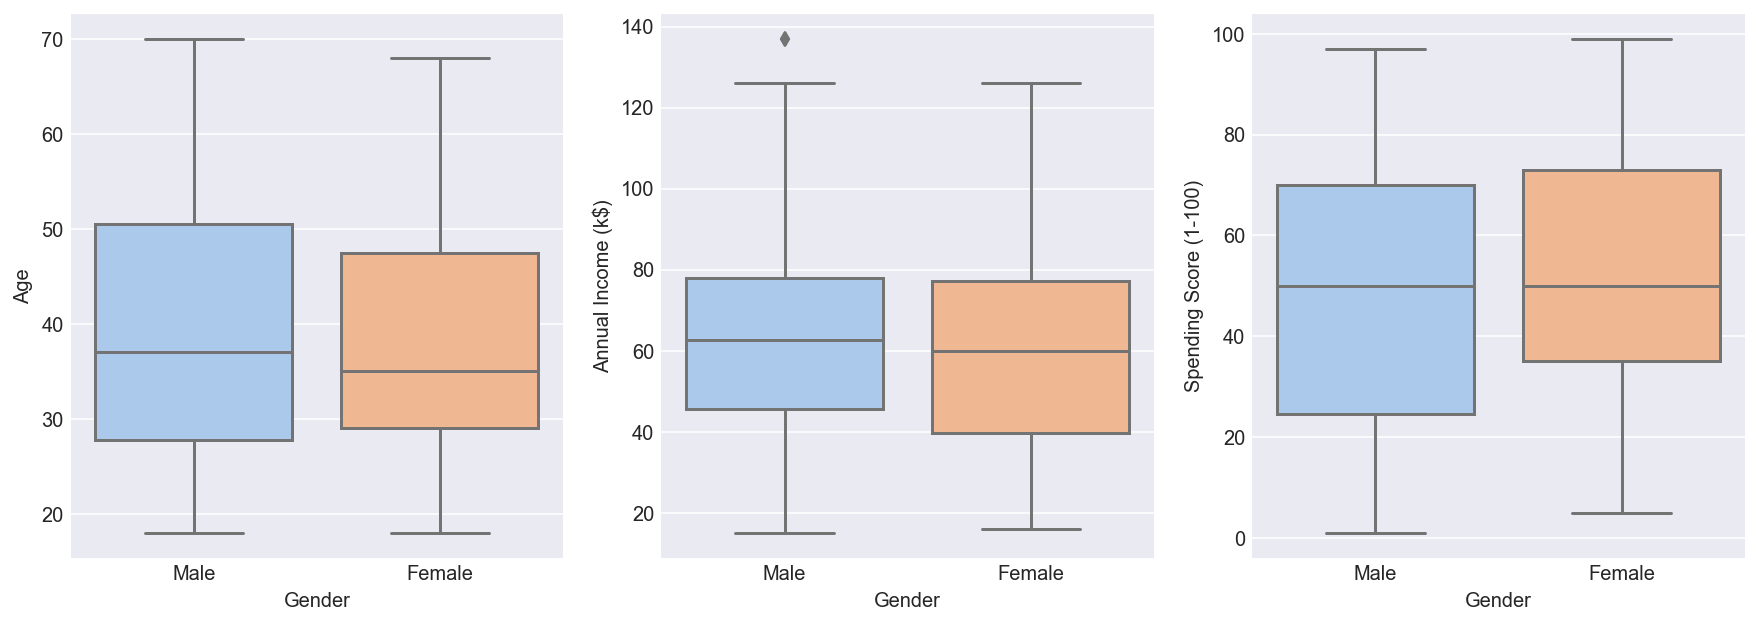

In [81]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False, sharey=False)

sns.boxplot(x="Gender", y="Age", data=X_feat, ax=axes[0], palette="pastel")
sns.boxplot(
    x="Gender", y="Annual Income (k$)", data=X_feat, ax=axes[1], palette="pastel"
)
sns.boxplot(
    x="Gender", y="Spending Score (1-100)", data=X_feat, ax=axes[2], palette="pastel"
)

#### Plotting correlations among the features

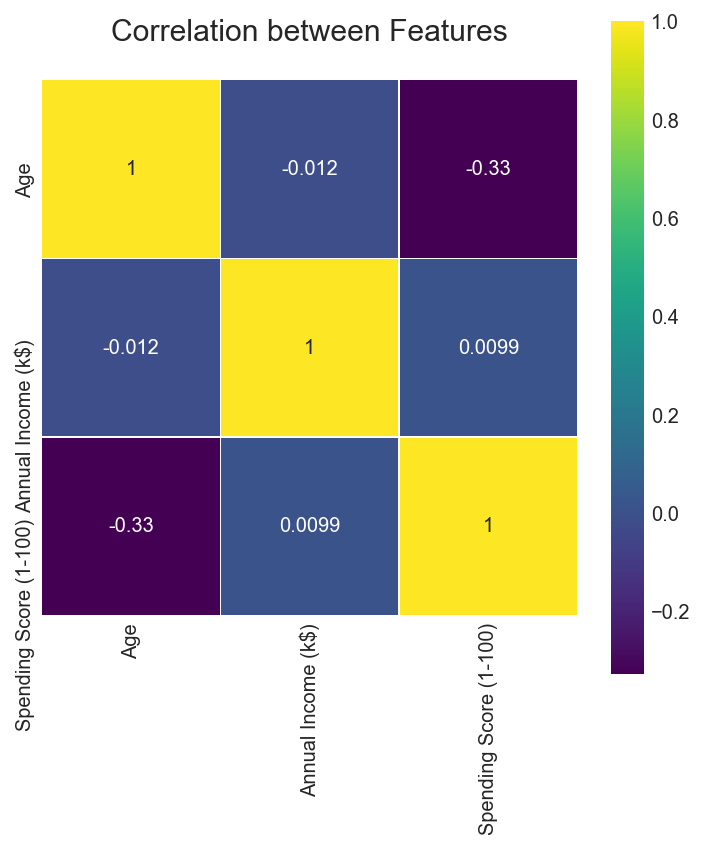

In [83]:
colormap = plt.cm.viridis
plt.figure(figsize=(6, 6))
plt.title("Correlation between Features", y=1.05, size=15)
sns.heatmap(
    X_feat.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor="white",
    annot=True,
)

#### Plotting the customers data in a 3D axis

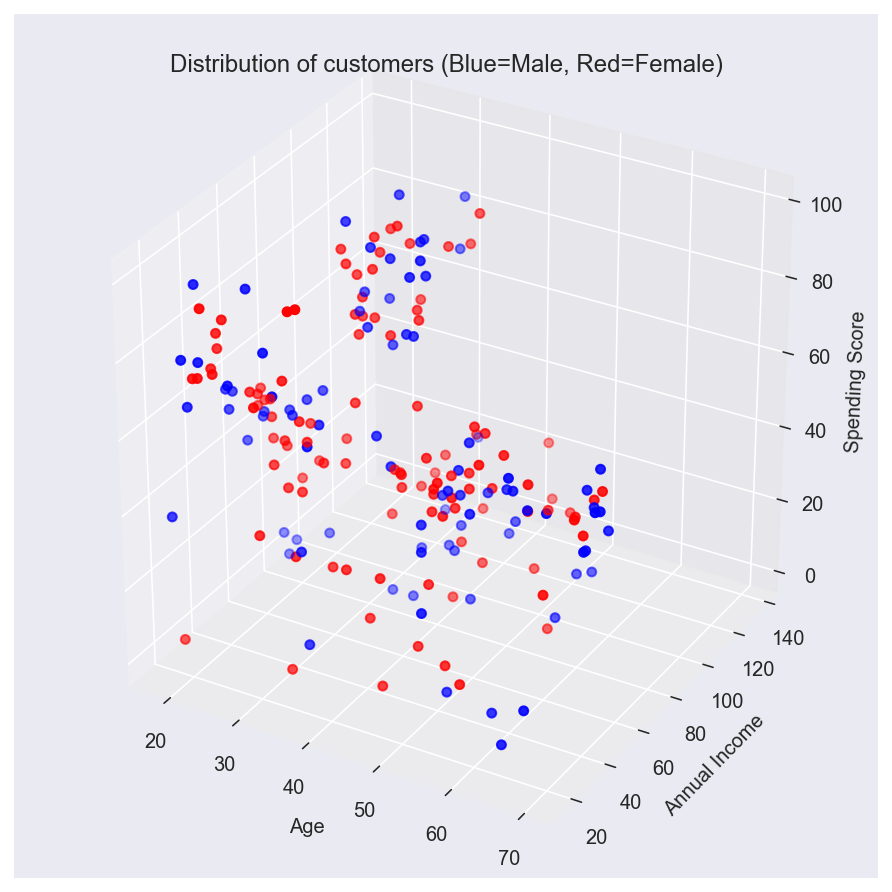

In [95]:
fig = plt.figure(figsize=(6, 6))

ax = Axes3D(fig)
x = X_feat["Age"].values
y = X_feat["Annual Income (k$)"].values
z = X_feat["Spending Score (1-100)"].values
color = ["blue" if gender == "Male" else "red" for gender in X_feat["Gender"].values]

ax.scatter(x, y, z, c=color, marker="o")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.title("Distribution of customers (Blue=Male, Red=Female)")
plt.show()

### Hierarchical Clustering Model

**We now implement a hierarchical clustering model using the Ward distance matrix for the dendogram**

In [96]:
# Change the Gender column to a binary 1 or 0 encoded column
try:
    X_feat["Male"] = X_feat.apply(
        lambda row: 1 if row["Gender"] == "Male" else 0, axis=1
    )
    X_feat.drop(["Gender"], axis=1, inplace=True)
except Exception as e:
    print("Exception occured and caught", e)

In [131]:
X_feat_int64 = X_feat.values

### Using the sklearn.cluster.AgglomerativeClustering Model

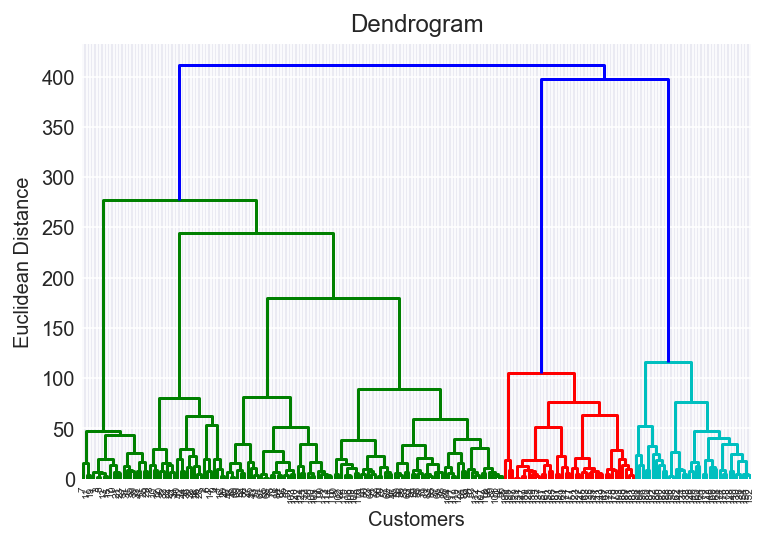

In [133]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_feat_int64, method="ward"))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

We can observe from the above dendrogram that there are nominally three significant clusters in our dataset

In [134]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X_feat_int64)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

A 2D plot of our clustering results

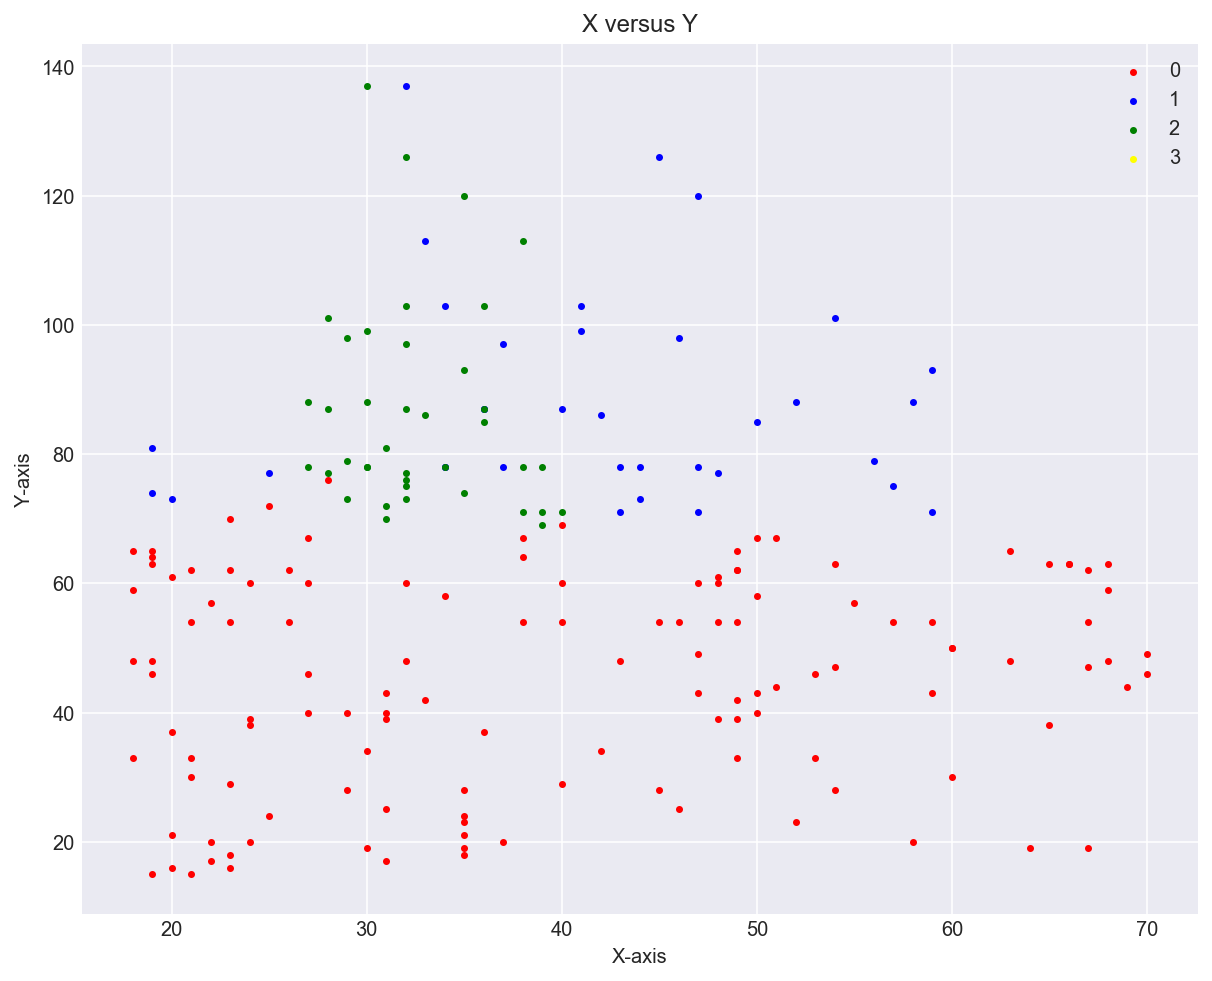

In [135]:
plot(X_feat_int64, y_hc)

A 3D plot of our clustering results

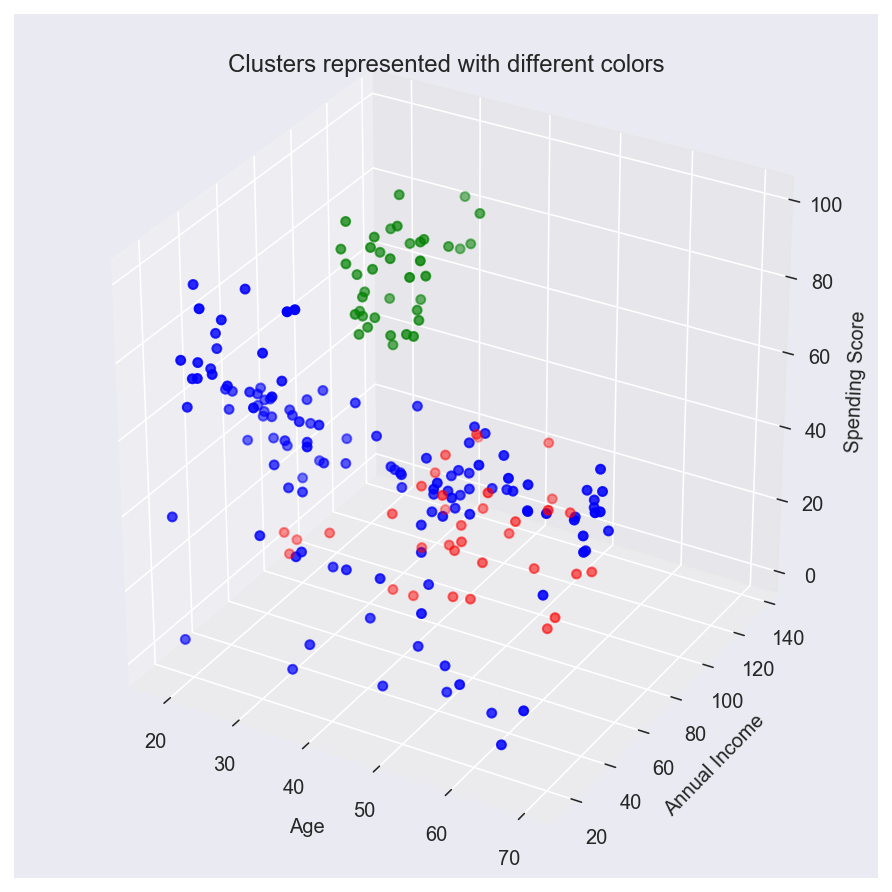

In [137]:
fig = plt.figure(figsize=(6, 6))

ax = Axes3D(fig)
x = X_feat_int64[:, 0]
y = X_feat_int64[:, 1]
z = X_feat_int64[:, 2]
color = [["blue", "red", "green"][group] for i, group in enumerate(y_hc)]

ax.scatter(x, y, z, c=color, marker="o")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.title("Clusters represented with different colors")
plt.show()